In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
config_file = "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_dataset ="frozen_inference_graph.pb"

In [ ]:
classLabels=[]
filename="label.txt"
with open(filename ,'rt')as fpt:
  classLabels=fpt.read().rstrip("\n").split("\n")

In [ ]:
classLabels

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [ ]:
len(classLabels)

80

In [ ]:
model=cv2.dnn_DetectionModel(frozen_dataset,config_file)

In [ ]:
model.setInputSize(320,320) 
model.setInputScale (1.0/127.5) ## 255/2 = 127.5 
model.setInputMean ((127.5,127.5,127.5)) ##mobile=>-1,1
model.setInputSwapRB (True)

< cv2.dnn.Model 0x7f0a1ddbc130>

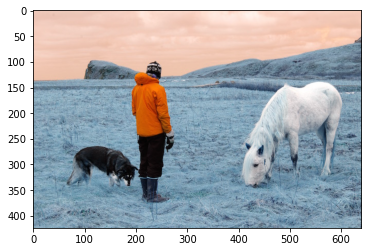

In [ ]:
img=cv2.imread("/content/person.jpg")
plt.imshow(img)

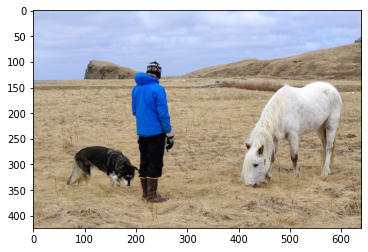

In [ ]:
imgrgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(imgrgb)

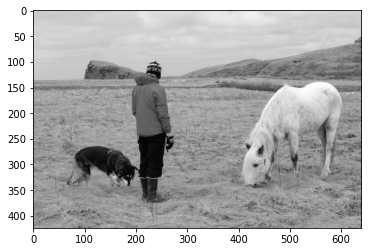

In [ ]:
image = cv2.imread('/content/person.jpg')
(row, col) = image.shape[0:2]
for i in range(row):
    for j in range(col):
        image[i, j] = sum(image[i, j]) * 0.33
plt.imshow( image)

In [ ]:
ClassIndex,confidance,bbox=model.detect(img,confThreshold=0.5)

In [ ]:
ClassIndex

array([ 1, 20, 18, 19, 20], dtype=int32)

In [ ]:

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip (ClassIndex.flatten(), confidance.flatten(), bbox): 
  cv2.rectangle(img, boxes, (255, 0, 0), 2) 
  cv2.putText(img, classLabels [ClassInd-1], (boxes[0]+10, boxes [1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3) 

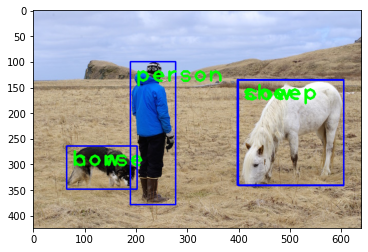

In [ ]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))